In [1]:
import os
import sys
import json
sys.path.append('../')
from constants import OPENAI_API_KEY
from utils import *
import google_sheet as sheets

import openai
# import openai.ChatCompletion as ChatCompletion 
from langchain.chains import ConversationalRetrievalChain, RetrievalQA
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import DirectoryLoader, TextLoader
from langchain.embeddings import OpenAIEmbeddings
from langchain.indexes import VectorstoreIndexCreator
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
from langchain.llms import OpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
#summary imports
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import UnstructuredFileLoader


from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

#visualizations imports
import networkx as nx
import matplotlib.pyplot as plt
import pickle

os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

In [4]:
top = Topic("Backpack")
problems = sheets.get_people_responses()
print(problems)


RefreshError: ('invalid_grant: Token has been expired or revoked.', {'error': 'invalid_grant', 'error_description': 'Token has been expired or revoked.'})

In [ ]:
top.classify_problems(problems)

go to merge
after combine:  Merged problems:

1. Continuous use of the backpack causes material wear and tear, leading to holes, fraying, or rips.
   - Opt for backpacks made from high-quality, durable materials like Cordura nylon or ballistic nylon, and regularly inspect and mend small damages using fabric patches or adhesive solutions to prevent further deterioration.

2. Zippers often fail due to frequent use, leading to jams, teeth breakage, or detachment.
   - Choose backpacks with YKK or similarly reputable zipper brands known for durability, and regularly lubricate zippers with wax or silicone spray to maintain smooth operation and prevent corrosion.

3. Overloading the backpack or carrying heavy items can strain seams and stitching, causing them to weaken or unravel.

4. Continuous contact with rough surfaces leads to abrasions, scuffs, and scratches, compromising the backpack's integrity.
   - Apply protective coatings or use accessories like a rain cover or protective sleeve 

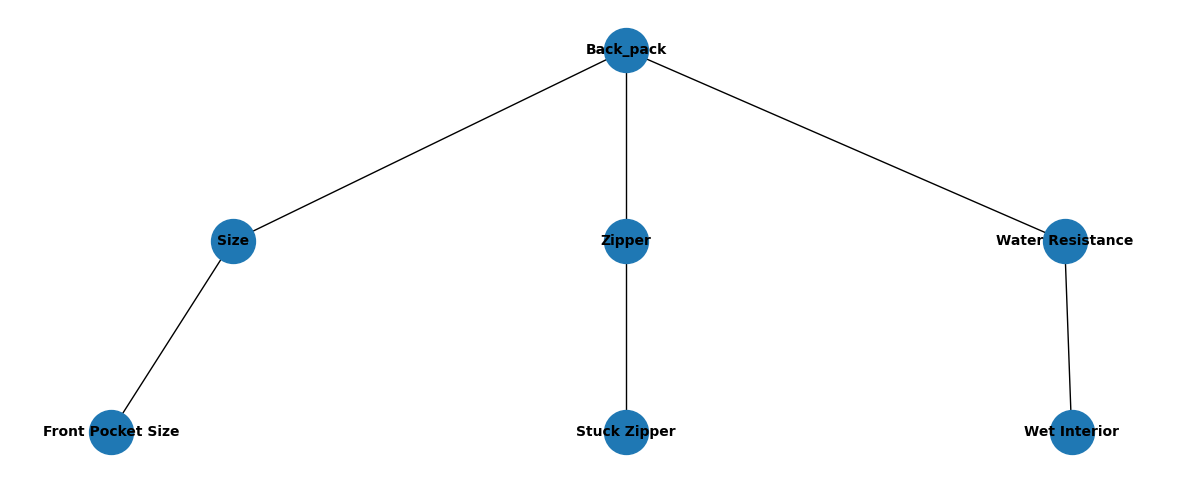

In [ ]:
fig = top.plot_hierarchy_problems()

In [ ]:
prob = top.problems[1]
print(prob.description)

The zippers are getting stuck after a few uses of the backpack, and it's hard to open and close the backpack cells.


In [ ]:
prob.create_factors()


create triplets


Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised ServiceUnavailableError: The server is overloaded or not ready yet..


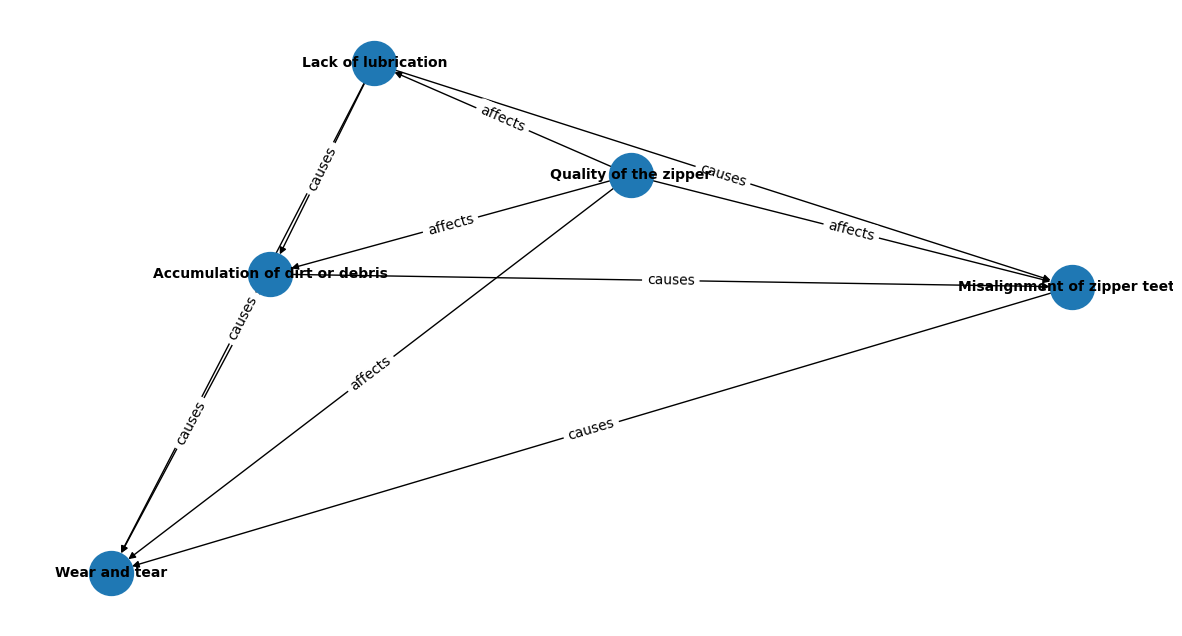

In [ ]:
from utils import *
fig = prob.build_knowledge_graph()


In [ ]:
def long_summary(text, chank_size = 2000):
    text_splitter = RecursiveCharacterTextSplitter(
        # Set a really small chunk size, just to show.
        chunk_size = chank_size,
        chunk_overlap = 0
    )
    small_chanks = text_splitter.split_documents(text)
    # llm = OpenAI()#model="gpt-3.5-turbo")
    llm = ChatOpenAI(temperature = 0, model='gpt-3.5-turbo')
    chain = load_summarize_chain(llm, chain_type="map_reduce", verbose=True)
    summary = chain.run(small_chanks)

    return summary

gl_loader = UnstructuredFileLoader("../shared_ideas/data.txt")
gl_doc = gl_loader.load()
print(gl_doc[:100])
print(long_summary(gl_doc))

[Document(page_content='Gun laws in Israel are comprehensive despite soldiers being allowed to carry their service weapons on or off duty. Civilians must obtain a firearms license to lawfully acquire, possess, sell or transfer firearms and ammunition. In 2018, Israel significantly loosened firearms restrictions, allowing all citizens who had undergone combat training and qualified in Advanced Infantry Training (\'Rifleman "07"\') to apply for a private handgun license. [256]\n\nPrior to 2018, only a small group of people had been eligible for firearms licenses: certain retired military personnel, police officers or prison guards; residents of settlements (in the West Bank) or those who often work in such towns; and licensed hunters and animal-control officers. Age requirements vary: 21 for those who completed military service or civil service equivalent, 27 otherwise, and 45 for non-citizens. Firearm license applicants must have been a resident of Israel for at least three consecutive 

In [ ]:
def summary(new_text, old_summary = ""):
    template = ""
    if old_summary == "":
        template = """summarize the text below:{old_summary}
                    {input}"""
    else:
        template = """use the old summary = {old_summary} 
                    and create a summary that contains the old summary and the new text: {input}
                    """
    
    instractions = """
                    rules for the summary:
                    1. start with a 2-4 words that describe the topic, example: topic: gun control in Israel
                    2. don't add information that could be wrong and not in the text.
                    3. use clear and simple language.
                """
    template = template + instractions
    prompt = PromptTemplate(input_variables={"input", "old_summary"}, template=template)
    llm = ChatOpenAI(temperature = 0.5, model='gpt-3.5-turbo')
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(input = new_text, old_summary = old_summary)

    return result

text = ""
with open("data.txt", "r") as f:
    text = f.read()
summary = summary(text)
print(summary)  


Topic: Gun laws in Israel

Summary: Gun laws in Israel are comprehensive, requiring civilians to obtain a firearms license to legally acquire, possess, sell, or transfer firearms and ammunition. In 2018, restrictions were loosened, allowing qualified citizens with combat training to apply for a private handgun license. Prior to this, only specific groups, such as retired military personnel and licensed hunters, were eligible. Applicants must pass background checks, establish a genuine reason for firearm possession, and undergo weapons training. License holders must renew their licenses every three years and demonstrate safe storage. Organizations can issue carry-licenses to their members, and shooting club members can possess additional firearms. Licensed individuals are allowed to carry handguns loaded in public. There are a significant number of licensed firearms in Israel, along with some illegal gun ownership.


: 

In [ ]:
def logic_statment(text):
    template = """you are a logic expert, meaning break the text below into simpel logic statements.
                for example: we need to reduce wight so the car will be faster.
                the logic statment will be: lighter car -> move faster.
                after that you need to say rater the statment is reasonable or not.
                the text = {input}"""
    prompt = PromptTemplate(input_variables={"input"}, template=template)
    llm = ChatOpenAI(temperature = 0.5, model='gpt-3.5-turbo')
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(input = text)

    return result

print(logic_statment("if kobi won't play with us we will sure lose the game"))

Statement: If Kobi doesn't play with us, we will definitely lose the game.

Logic statement: Not playing with Kobi -> Losing the game.

Reasonability: The statement is reasonable. The absence of Kobi's participation implies a negative outcome for the team, resulting in losing the game.


## Workflow

In [11]:
%reload_ext autoreload
%autoreload 2

import importlib
from utils import *
import utils
from utils import Problem, Challenge, Solution

# importlib.reload(utils)


In [ ]:
# Deserialize the topic storage
with open('data.pickle', 'rb') as file:
    top2 = pickle.load(file)

In [ ]:
prob = top2.problems[1]
prob.triplets

["('Quality of Material') -[affects]-> ('Design Flaws')",
 "('Environmental Conditions') -[affects]-> ('Improper Maintenance')",
 "('Improper Maintenance') -[leads to]-> ('Design Flaws')",
 "('Design Flaws') -[contribute to]-> ('Environmental Conditions')",
 "('Intended Use and Load') -[impacts]-> ('Quality of Material')",
 "('Quality of Material') -[influences]-> ('Intended Use and Load')",
 "('Environmental Conditions') -[influences]-> ('Quality of Material')",
 "('Improper Maintenance') -[affects]-> ('Environmental Conditions')",
 "('Design Flaws') -[affects]-> ('Intended Use and Load')",
 "('Intended Use and Load') -[affects]-> ('Environmental Conditions')",
 'Quality of Material -[cause]-> durability',
 'Environmental Conditions -[cause]-> durability',
 'Improper Maintenance -[cause]-> durability',
 'Design Flaws -[cause]-> durability',
 'Intended Use and Load -[cause]-> durability']

problems = [
    "1. Insufficient storage compartments for organizing different items efficiently.",
    "2. Lack of durability in the material used, leading to frequent wear and tear.",
    "3. Inadequate support and padding in the shoulder straps causing discomfort during extended use.",
    "4. Limited waterproofing capabilities, making the backpack vulnerable to damage in rainy conditions."
]
{'main_class': 'Storage', 'sub_class': 'Insufficient compartments', 'description': 'Insufficient storage compartments for organizing different items efficiently.'}
{'main_class': 'Durability', 'sub_class': 'Material quality', 'description': 'Lack of durability in the material used, leading to frequent wear and tear.'}
{'main_class': 'Comfort', 'sub_class': 'Shoulder strap support', 'description': 'Inadequate support and padding in the shoulder straps causing discomfort during extended use.'}
{'main_class': 'Waterproofing', 'sub_class': 'Limited capabilities', 'description': 'Limited waterproof

(<networkx.classes.graph.Graph at 0x1b13537e130>,
 {'backpack': (365.64, 162.0),
  'Storage': (166.64, 90.0),
  'Insufficient compartments': (104.64, 18.0),
  'Durability': (312.64, 90.0),
  'Material quality': (294.64, 18.0),
  'Comfort': (453.64, 90.0),
  'Shoulder strap support': (471.64, 18.0),
  'Waterproofing': (626.64, 90.0),
  'Limited capabilities': (661.64, 18.0)})

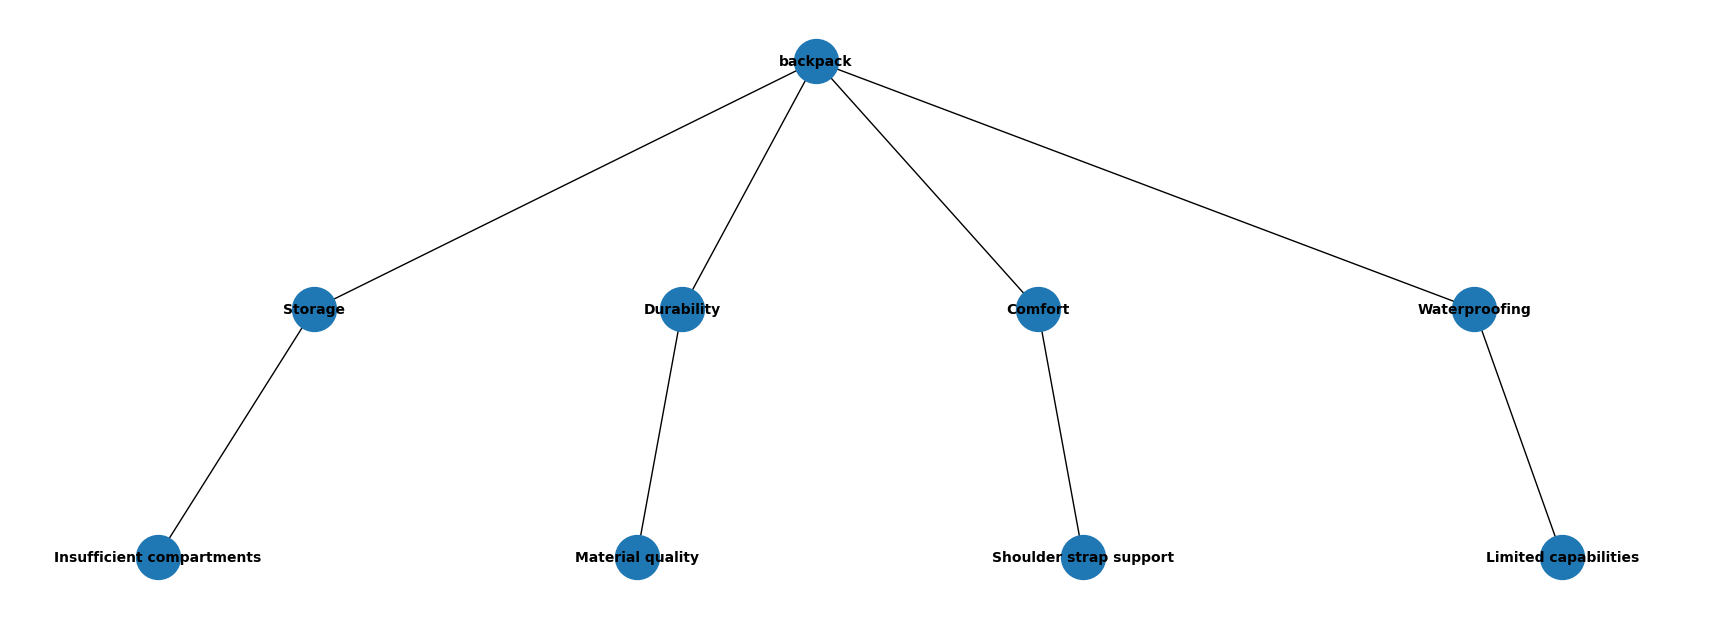

In [ ]:
top2 = Topic("backpack")
top2.generate_problems(4)
top2.plot_hierarchy_problems()

{'main_class': 'Storage', 'sub_class': 'Insufficient Compartments', 'description': 'Insufficient storage compartments for organizing different items efficiently.'}
{'main_class': 'Durability', 'sub_class': 'Material Wear and Tear', 'description': 'Lack of durability in the material used, leading to frequent wear and tear.'}
{'main_class': 'Comfort', 'sub_class': 'Shoulder Strap Support', 'description': 'Inadequate support and padding in the shoulder straps causing discomfort during extended use.'}
{'main_class': 'Waterproofing', 'sub_class': 'Limited Capabilities', 'description': 'Limited waterproofing capabilities, making the backpack vulnerable to damage in rainy conditions.'}
{'main_class': 'Comfort', 'sub_class': 'Belt Discomfort', 'description': 'My backpack belt is hurting my sides when the backpack is heavy.'}
{'main_class': 'Durability', 'sub_class': 'Zipper Breakage', 'description': 'The zippers are breaking after a year of use.'}


(<networkx.classes.graph.Graph at 0x1b13510b5b0>,
 {'backpack': (597.59, 162.0),
  'Storage': (256.59, 90.0),
  'Insufficient Compartments': (106.59, 18.0),
  'Durability': (507.59, 90.0),
  'Material Wear and Tear': (325.59, 18.0),
  'Comfort': (688.59, 90.0),
  'Shoulder Strap Support': (688.59, 18.0),
  'Waterproofing': (923.59, 90.0),
  'Limited Capabilities': (1037.6, 18.0),
  'Belt Discomfort': (868.59, 18.0),
  'Zipper Breakage': (507.59, 18.0)})

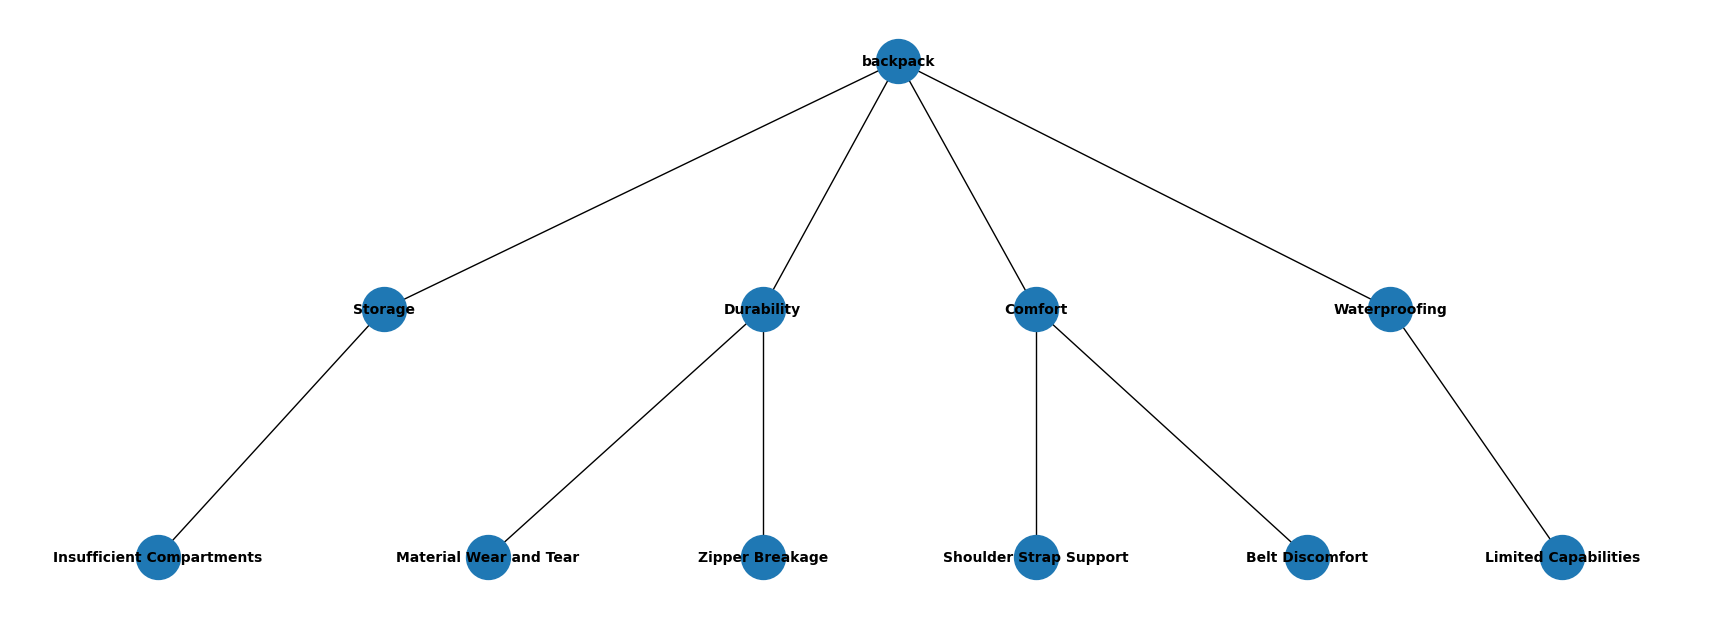

In [ ]:
prob = """1. my backpack belt is hurting my sides when the backpack is heavy.
2. the zipers a braking after a year of use."""
top2.classify_exsisting_problems(prob)
top2.plot_hierarchy_problems()


    problem class: Storage
    sub class: Insufficient Compartments
    problem details: Insufficient storage compartments for organizing different items efficiently.


    problem class: material
    sub class: durability
    problem details: Lack of durability in the material used, leading to frequent wear and tear.


    problem class: Comfort
    sub class: Shoulder Strap Support
    problem details: Inadequate support and padding in the shoulder straps causing discomfort during extended use.


    problem class: mechanical
    sub class: waterproofing
    problem details: Limited waterproofing capabilities, making the backpack vulnerable to damage in rainy conditions.


    problem class: Comfort
    sub class: Belt Discomfort
    problem details: My backpack belt is hurting my sides when the backpack is heavy.


    problem class: mechanical
    sub class: zippers
    problem details: The zippers are breaking after a year of use.




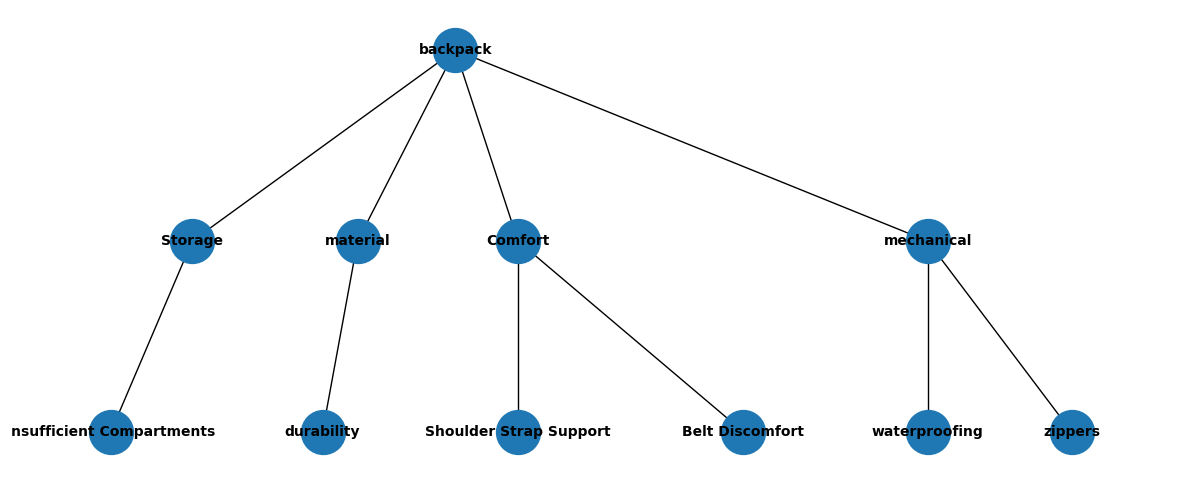

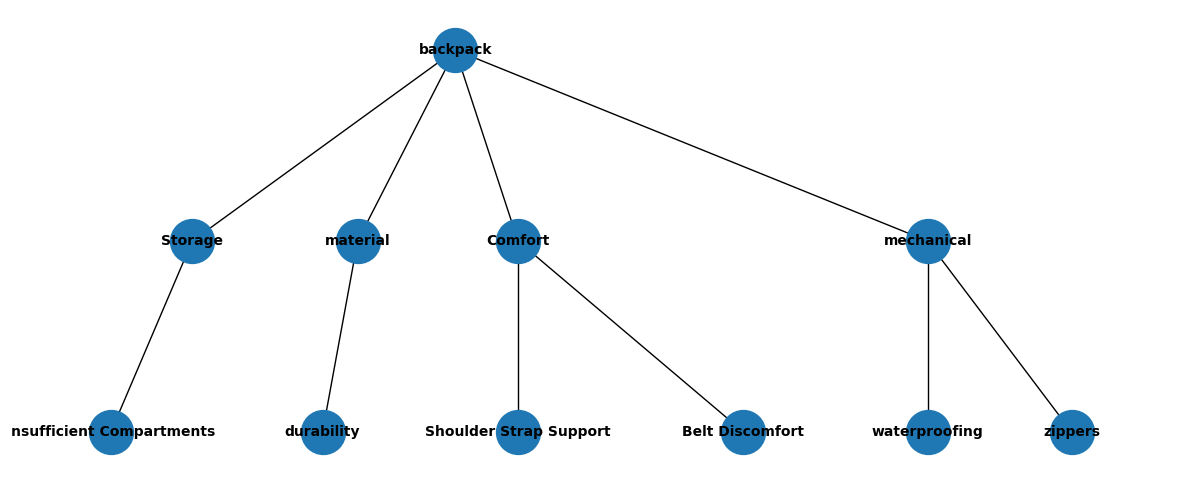

In [ ]:
print(top2.get_problems_str())
# top2.plot_hierarchy_problems()

In [ ]:
p = top2.problems[1]
p.create_factors(7)
# p.build_knowledge_graph()

raw result: Sure! Here is a list of the top 7 significant factors that influence lack of durability in the material used, leading to frequent wear and tear:

```python
[
    {
        "factor_name": "Poor quality of materials",
        "explanation": "The use of low-quality materials that are not designed to withstand regular wear and tear can lead to frequent deterioration."
    },
    {
        "factor_name": "Inadequate maintenance",
        "explanation": "Lack of proper care and maintenance, such as cleaning, lubrication, or regular inspections, can accelerate the wear and tear process."
    },
    {
        "factor_name": "Environmental conditions",
        "explanation": "Extreme temperatures, humidity, exposure to chemicals, or other harsh environmental conditions can degrade the material over time."
    },
    {
        "factor_name": "Improper usage",
        "explanation": "Misuse or improper handling of the material, such as exceeding weight limits, incorrect assembly, or e

In [ ]:
top2.challenges = []
top2.create_challenge(1)
print(top2.challenges[0].description)

Challenge: Enhancing Backpack Durability

Problem Explanation:
The current material used in backpack manufacturing lacks durability, resulting in frequent wear and tear. This issue leads to reduced lifespan and increased costs for customers who need to frequently replace their backpacks. To address this problem, the innovation team must find ways to improve the backpack's durability, ensuring it can withstand daily wear and tear for an extended period.

Key Performance Indicators (KPIs):
1. Increased Material Longevity: Measure the average lifespan of backpacks produced using the new material. This KPI will help assess the effectiveness of the material in improving durability. The goal is to achieve a significant increase in the average lifespan compared to the previous material.
2. Decreased Customer Complaints: Monitor the number of customer complaints related to backpack wear and tear. This KPI will reflect the success of the innovation in reducing the frequency of durability issues

In [ ]:
top2.challenges[0].solutions = []
top2.challenges[0].create_solutions(3)


{'main_class': 'Backpack Durability', 'sub_class': 'Material Improvement', 'description': 'Implementing a new material with higher strength and durability in backpack manufacturing.', 'grade': {'Cost': 4, 'Feasibility': 3, 'Efficiency': 4, 'Increase in Material Strength': 5, 'Reduction in Repair and Replacement Costs': 5}}
{'main_class': 'Backpack Durability', 'sub_class': 'Reinforcement', 'description': 'Reinforcing critical areas of the backpack with additional layers or patches to improve durability.', 'grade': {'Cost': 3, 'Feasibility': 5, 'Efficiency': 4, 'Increase in Material Strength': 4, 'Reduction in Repair and Replacement Costs': 4}}


Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised Timeout: Request timed out: HTTPSConnectionPool(host='api.openai.com', port=443): Read timed out. (read timeout=600).


{'main_class': 'Backpack Durability', 'sub_class': 'Maintenance and Inspection', 'description': 'Conducting regular maintenance and inspections on backpacks to identify and address potential issues before they become major problems.', 'grade': {'Cost': 5, 'Feasibility': 5, 'Efficiency': 3, 'Increase in Material Strength': 3, 'Reduction in Repair and Replacement Costs': 5}}


In [ ]:
top2.challenges[0].create_fundamental_problems()
solutions = top2.challenges[0].get_solutions_str()
print(solutions)

Reinforced Material Technology:Incorporating advanced materials to enhance durability and resist tearing, stretching, and abrasion
fundamental problems:
1. Lack of durability: The materials currently used in the solution are not durable enough to withstand tearing, stretching, and abrasion.
2. Susceptibility to tearing: The current materials used in the solution are easily torn when subjected to stress or pressure.
3. Lack of resistance to stretching: The current materials used in the solution lose their shape and integrity when stretched, reducing their effectiveness.
4. Vulnerability to abrasion: The current materials used in the solution are prone to wear and damage when subjected to friction or rubbing against surfaces.

Improved Stitching and Reinforcements:Enhancing strength and durability through improved stitching techniques and reinforcements
Fundamental problems:
1. Weak stitching techniques: The current stitching techniques used in the manufacturing process are not strong en

again


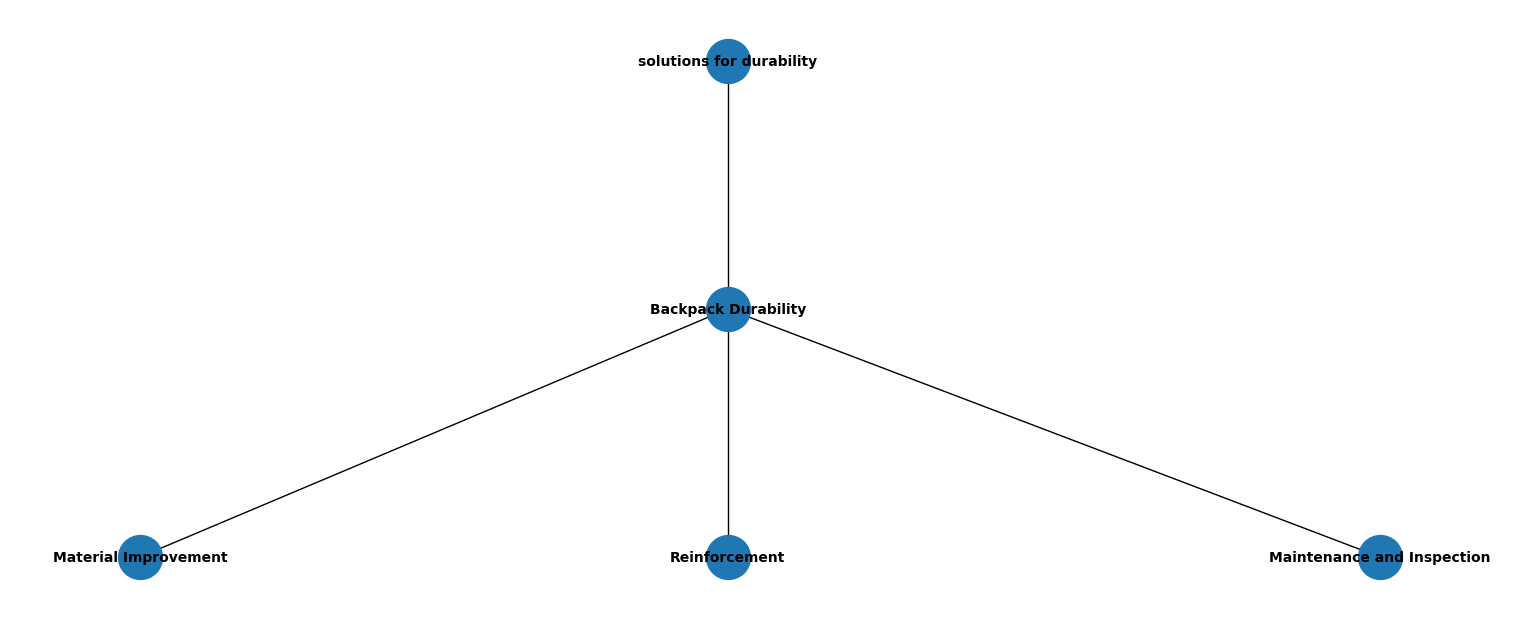

In [ ]:
plt = top2.challenges[0].plot_hierarchy_solutions()

In [ ]:
sol = top2.challenges[0].solutions[0]
print(sol.solution_str())
sol_update = """
give example for metirials we should use for the backpack, and what stiching we need to use that will make the backpack stronger.
our bags already go through a strict quality control process, so we can remove that part from the solution.
"""
sol.update_solution(sol_update)



    [solution class: Backpack Durability Enhancement 

    sub class: Reinforced Material and Stitching 

    solution description: To enhance the durability of the backpacks, one solution is to use reinforced material and stitching techniques. For example, we can use materials such as nylon or Cordura, which are known for their strength and resistance to wear and tear. Additionally, we can employ double or triple stitching methods, which provide extra reinforcement and prevent seams from unraveling. These measures will make the backpacks stronger and more durable. 

    grade: {'Cost': 3, 'Feasibility': 4, 'Efficiency': 4, 'Average Lifespan Increase': 5, 'Customer Complaints Decrease': 5}]
{
    "main_class": "Backpack Durability Enhancement",
    "sub_class": "Reinforced Material and Stitching",
    "description": "To enhance the durability of the backpacks, one solution is to use reinforced material and stitching techniques. For example, we can use materials such as nylon or Cordur

<module 'matplotlib.pyplot' from 'c:\\Users\\matan\\miniconda3\\envs\\myenv\\lib\\site-packages\\matplotlib\\pyplot.py'>


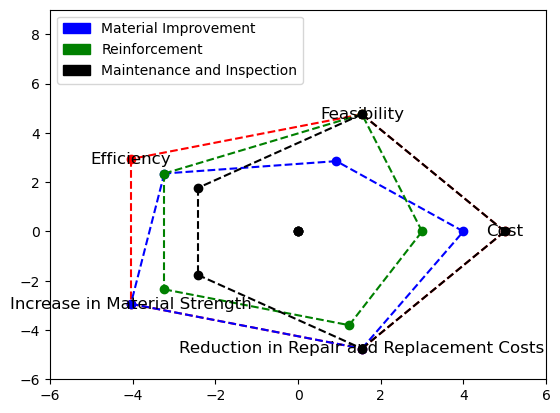

In [ ]:
plt = top2.challenges[0].plot_solutions_polygons(to_show = False)
print(plt)

## Merge simillar problems

In [ ]:
def merge_problems(problems_str):
    llm = ChatOpenAI(temperature = 0, model="gpt-4")
    template = """Given a list of problems {problems}, identify similar problems and put them in a list of simillar problems. 
    after that each list of similar problems should be merged into a single problem and put in a python list of merged problems."""

    template2 = """
    Given a list of problems {problems}, identify the similar problems and merge them into a single problem. put the problems in a python list.
    """
    prompt = PromptTemplate(input_variables={"problems"}, template=template2)
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(problems = problems_str)
    # print(result)
    just_prob = result[result.find("["):] # result.find("]") +1]
    problems = ast.literal_eval(just_prob)
    return problems

def classify_problems(problems_str):
    llm = ChatOpenAI(temperature = 0.5, model="gpt-4")
    # with appropriate names for each class
    classify_template = """ Classify the below problems in hierarchy way classes so under each class will be at least 2 problems, give appropriate and meaningful names for each class. 
    add the problems themself. don't add any introduction to your result.
    problems: {problems}.
    output in the format of python list of dictionary: [["class": "class", "problem_name": "problem_name", "description": "description", "reporter": "reporter"],...]
    so each problem will be in the format of dictionary."""

    prompt = PromptTemplate(input_variables={"problems"}, template=classify_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(problems = problems_str)#, num_classes = num_classes)
    prob_list = ast.literal_eval(result)
    return prob_list

def extract_problems(text):
    llm = ChatOpenAI(temperature = 0.5, model="gpt-4")
    # with appropriate names for each class
    classify_template = """ given the text below, extract the problems from the text and put them in a python list."""

    prompt = PromptTemplate(input_variables={"problems"}, template=classify_template)
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(problems = text)#, num_classes = num_classes)
    prob_list = ast.literal_eval(result)
    return prob_list
            

In [ ]:
problems = """Problem: "The zipper on my backpack is stuck, and I can't open it."
    Problem: "I'm having trouble closing the zipper on my backpack; it's jammed."
    Problem: "The zipper of my backpack is difficult to zip, and it often gets stuck."
    Problem: "I accidentally spilled a drink inside my backpack, and my books are soaked."
    Problem: "I lost one of the shoulder straps on my backpack, and it's causing discomfort."""
    
pan_problems = """
Inadequate Heat Distribution: The pan fails to evenly distribute heat, resulting in uneven cooking.

Prone to Warping: The pan warps easily when exposed to high temperatures, rendering it unfit for consistent use.

Sticky Residue Buildup: Despite repeated seasoning, a persistent sticky residue accumulates on the pan's surface.

Difficult to Clean: The pan proves stubbornly challenging to clean, with food residue often sticking to it even after vigorous scrubbing.

Rapid Nonstick Coating Wear: The nonstick coating wears off quickly, necessitating frequent replacement.

Uneven Cooking Surface: An irregular cooking surface leads to uneven browning and cooking of food.

Handle Insulation Issues: The handle lacks proper insulation, making it uncomfortably hot to hold during cooking.

Limited Durability: The pan shows signs of wear and tear relatively quickly, with scratches and dents appearing after minimal use.

Weight Concerns: The pan is excessively heavy, making it cumbersome to maneuver and handle in the kitchen.

Compatibility Problems: The pan is incompatible with certain cooktops, limiting its versatility in the kitchen."""

merged_problems = merge_problems(pan_problems)
print()
print("merge problems:")
for p in merged_problems:
    print(p)

print()
print("classify problems:")
prob_list = classify_problems(merged_problems)
for p in prob_list:
    print(p)
    



merge problems:
Inadequate Heat Distribution and Uneven Cooking Surface: The pan fails to evenly distribute heat and has an irregular cooking surface, resulting in uneven cooking and browning of food.
Prone to Warping and Limited Durability: The pan warps easily when exposed to high temperatures and shows signs of wear and tear relatively quickly, rendering it unfit for consistent use.
Sticky Residue Buildup and Difficult to Clean: Despite repeated seasoning, a persistent sticky residue accumulates on the pan's surface and proves stubbornly challenging to clean, with food residue often sticking to it even after vigorous scrubbing.
Rapid Nonstick Coating Wear: The nonstick coating wears off quickly, necessitating frequent replacement.
Handle Insulation Issues: The handle lacks proper insulation, making it uncomfortably hot to hold during cooking.
Weight Concerns: The pan is excessively heavy, making it cumbersome to maneuver and handle in the kitchen.
Compatibility Problems: The pan is

In [ ]:
# convert to jason file

new_problems_list = []

for problem_class in prob_list:
    for problem in problem_class['problems']:
        new_problem = {}
        new_problem['class'] = problem_class['class']
        new_problem['problem name'] = problem['problem_name']
        new_problem['description'] = problem['description']
        new_problem['reporter'] = 'GPT-4'
        new_problems_list.append(new_problem)
        

with open('problems.json', 'w') as json_file:
    json.dump(new_problems_list, json_file)

In [ ]:
def filter_problems(problems_str, topic):
    llm = ChatOpenAI(temperature = 0, model="gpt-4")


    template = """Given a list of problems {problems}, remove all problems that are not related to {topic} or problems that not relate to the product manufacture.
    output in a format of python list
    """
    prompt = PromptTemplate(input_variables={"problems", "topic"}, template=template)
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(problems = problems_str, topic = topic)
    # print(result)
    just_prob = result[result.find("["):]
    problems = ast.literal_eval(just_prob)
    return problems

problems = """Problem: "The zipper on my backpack is stuck, and I can't open it."
    Problem: "I'm having trouble closing the zipper on my backpack; it's jammed."
    Problem: "The zipper of my backpack is difficult to zip, and it often gets stuck."
    Problem: "I accidentally spilled a drink inside my backpack, and my books are soaked."
    Problem: "I lost one of my pens in my backpack, and I can't find it."
    problem: 'we need to reduce wieght so the car will be faster.'"""
filtered_problems = filter_problems(problems, "backpack")

for p in filtered_problems:
    print(p)

The zipper on my backpack is stuck, and I can't open it.
I'm having trouble closing the zipper on my backpack; it's jammed.
The zipper of my backpack is difficult to zip, and it often gets stuck.
I accidentally spilled a drink inside my backpack, and my books are soaked.
I lost one of my pens in my backpack, and I can't find it.


: 

## Knowledge graph work 

In [12]:
# Deserialize the topic storage
with open('demo.pickle', 'rb') as file:
    top = pickle.load(file)
for p in top.problems:
    print(p.sub_class)

Backpack Material Deterioration
Zipper Malfunction
Seam and Stitching Strain
Strap and Buckle Damage


In [76]:
def create_factors(prob, factors_number=5):
    llm = ChatOpenAI(temperature = 0.5, model="gpt-4")
    template = """can you pls list the top {factors_number} most segnificate factors that influence: {problem}.
    be specific and short.
    output as a pytnon list of dictionary:""" + '[["factor_name": , "explanation": ], ...]'
    prompt = PromptTemplate(input_variables={"problem", "factors_number"}, template=template)
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(problem = prob, factors_number=factors_number)
    # print(f"raw result: {result}") 
    if not result.startswith("["):
        result = result[result.find("["):result.find("]")+1]
    
    factors_list = ast.literal_eval(result)
    # factors_list = factors_list[:10]
    print(f"factors list: {factors_list}")
    return factors_list
    
# def explain_factors(prob, factors):
#     llm = ChatOpenAI(temperature = 0.5, model="gpt-4")
#     template = """given the next problem: {problem}, explain how the factors below influence the problem.
#     for each factor give a short explanation on how it affects the problem and how mutch it affects (use a scale of 1-5), 1 is not affect at all and 5 is very affect.
#     if a factor is affecting another factor, explain how it affects it.
#     factors: {factors}"""
#     prompt = PromptTemplate(input_variables={"problem", "factors"}, template=template)
#     chain = LLMChain(llm=llm, prompt=prompt)
#     result = chain.run(problem = prob, factors = factors)
#     return result

def create_triplets(str, factors, problem):
    llm = ChatOpenAI(temperature = 0.5, model="gpt-4")
    template = """given the text below, create a list of triplets that describe the text the best way.
    each triplet should be in the format of: subject -> verb -> object.
    text: {text}"""
    
    template2 = """given the factors: {factors}, give me the direct top cross influence or relationship between these factors, and with the factors and {problem}.
pls arrange it as a tripple A is connected in a certain way to B. like in knowledge graph.
pls compose it as tripples, one factor in relation to one other factor.
explain in short sentence each relation and how much if affects (use a scale of 1-10).
output as a triplets: (A) -[connected in a certain way]-> (B) : [explanation].
do not add any introduction to your result.
"""
    prompt = PromptTemplate(input_variables={"text"}, template=template)
    prompt2 = PromptTemplate(input_variables={"factors", "problem"}, template=template2)
    chain = LLMChain(llm=llm, prompt=prompt2)
    result = chain.run(factors=factors, problem = problem)#text = str)
    
    return result

def summerize(text):
    llm = ChatOpenAI(temperature = 0.5, model="gpt-3.5-turbo")
    template = """summarize the text below into short and clear summary:
    {text}"""
    prompt = PromptTemplate(input_variables={"text"}, template=template)
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(text = text)
    return result

def break_solution(problem, solution):
    llm = ChatOpenAI(temperature = 0.5, model="gpt-3.5-turbo")
    template = """given the next problem: {problem}, break the solution below into simple steps. give evidentce for why this will work and what are the problems that can occur.
    solution: {solution}
    """
    prompt = PromptTemplate(input_variables={"problem", "solution"}, template=template)
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(problem = problem, solution = solution)
    return result

def text_to_triplets(text, entities_num = 5):
    llm = ChatOpenAI(temperature = 0.5, model="gpt-4")
    entities = extract_entities(text, entities_num)
    print("entities: ", entities)
    template = """given the text below, create a list of direct top cross influence or relationship between {entities}.
pls arrange it as a tripple A is connected in a certain way to B. like in knowledge graph.
pls compose it as tripples, one factor in relation to one other factor.
explain in short sentence each relation and how much if affects (use a scale of 1-10).
output as a triplets: (A) -[connected in a certain way]-> (B) : [explanation].
The text: {text}"""
    prompt = PromptTemplate(input_variables={"entities", "text"}, template=template)
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(text = text, entities = entities)
    return result

def extract_entities(text, entities_num = 5):
    llm = ChatOpenAI(temperature = 0.5, model="gpt-4")#"gpt-3.5-turbo")
    template = """given the text below, extract the {num} main entities from the text and put them in a python list.
    name the entities with the most appropriate and short name.
    The text: {text}"""
    prompt = PromptTemplate(input_variables={"text", "num"}, template=template)
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(text = text, num = entities_num)
    return result


def sol_to_triplets(problem, text):
    # summary = summerize(text)
    break_sol = break_solution(problem, text)
    triplets = text_to_triplets(break_sol, 10)
    return triplets

In [35]:
prob1 = top.problems[0]
factors = create_factors(prob1.description)
# print(factors)
# print()
# expl = explain_factors(prob1.description, factors)
# print(expl)
print()
triplets = create_triplets(prob1.description, factors, prob1.sub_class)
print(triplets)


factors list: [{'factor_name': 'Material Quality', 'explanation': 'The quality of the material from which the backpack is made greatly influences its durability. Higher quality materials are less likely to wear and tear.'}, {'factor_name': 'Frequency of Use', 'explanation': 'The more frequently the backpack is used, the more it is exposed to wear and tear, leading to material degradation.'}, {'factor_name': 'Weight Carried', 'explanation': 'The amount of weight a backpack carries can strain the material, causing it to fray, rip, or develop holes over time.'}, {'factor_name': 'Contact with Rough Surfaces', 'explanation': 'Continuous contact with rough surfaces can cause abrasions, scuffs, and scratches, which compromise the integrity of the backpack.'}, {'factor_name': 'Maintenance and Care', 'explanation': 'Lack of proper maintenance and care can lead to accelerated wear and tear. This includes cleaning practices and storage conditions.'}]

(Material Quality) -[directly affects]-> (Fre

In [74]:
gaza_solutions = ['''Let NATO Nations Send Troops
By Ehud Olmert Mr. Olmert is a former prime minister of Israel.
ISRAEL’S MILITARY CAMPAIGN will continue until Hamas’s military capabilities are eliminated and it is removed from power. It’s hard to guess how long it will take, but if we are to be honest, it will take longer than Western societies are prepared to accept and longer than what their leaders — above all, President Joe Biden, a close friend of Israel — are willing to tolerate.
It is imperative for this reason that Israel provide the world with a clear picture of what it intends to do next, after the army has completed its work. The current Israeli government has no answer. It hasn’t had time to prepare a long-term strategy. But even if Prime Minister Benjamin Netanyahu and his coalition partners are unwilling and unable to propose the necessary next steps, the rest of Israel — and anyone who cares about its stability and security — can no longer avoid the question.
Here’s what I think should be part of that plan:
After the military campaign to remove Hamas from power and destroy its ability to fight, Israeli forces must withdraw all the way to the border of Gaza.
As that campaign now continues, Israel, the United States and other allies in parallel must agree on the deployment of an international force drawn from NATO countries, with their deployment agreed on by Israel and the United States and operating under the auspices of the U.N. Security Council.
The international force would take the place of the Israel Defense Forces in Gaza. Arab nations will probably not be willing to send in troops. While Egypt, Jordan, the United Arab Emirates, Bahrain and Saudi Arabia desire nothing more than the destruction of Hamas, which is a destabilizing force for their own governments, none will want to be seen as lending a hand to Israel’s military campaign.
The international force would help create a different governmental administration and would start to rebuild the civilian authorities and governing systems in the Gaza Strip for approximately 18 months.
Israel must announce that with the cessation of its military campaign, talks will immediately begin with the Palestinian Authority based on a two-state solution — which is the only political horizon that can offer stability and cooperation between Israelis and Palestinians and diplomatic, military and economic cooperation between Israel and the moderate Arab states.
There is no doubt that the Netanyahu government is unwilling, unable and unprepared to make such moves. Before any of these steps may be taken, therefore, there is no choice but to get rid of this government. Once it is gone and as soon as the military campaign in Gaza is over, the first steps toward what comes next may be taken
''', 
'''Create an Economic Future
By Raja Khalidi Mr. Khalidi is the director general of the Palestine Economic Policy Research Institute.
As Israel’s war on Gaza enters its third month, the warring parties and their allies are eyeing the endgame. Palestinians remain focused on solidarity in the face of what the chief U.N. relief official and the top E.U. diplomat have termed an apocalyptic scenario and what the Israeli agriculture minister has promised will be a second nakba. Regardless of who is left standing in Gaza after the war, governance of the Gaza Strip and the West Bank is best left to Palestinians to arrange through elections.
The Palestine Liberation Organization and most of the international community remain committed to a peaceful resolution of the conflict within a two-state configuration. In preparing for such a renewed possibility, Palestinians will have to reckon with their economic future. Since 1947, policymakers and academics have generated various visions of Palestinians’ economy after a two-state partition.
But for now, the demands of relief, shelter, economic recovery and reconstruction in Gaza are so overwhelming that there is little point in pondering a future whose shape is unknown.
Israeli bombardment has destroyed about half of Gaza’s building stock, in what some experts call a domicide. Just as much of the economic infrastructure and public service utilities needed to sustain the population has also been crushed. An economy that before the war had an annual per capita G.D.P. of less than $1,500 — already among the lowest in the world — will almost certainly register $0 next year for some two million Palestinians. Barring the unthinkable but not yet to be discounted risk of mass spontaneous exodus or deportation of the Gazan population to Sinai, there are three essential tasks to get the Gaza Strip back on its feet ahead of any larger solution.
First, Gaza’s people, most of whom have been displaced, need to be sheltered, clothed, fed, given medical care and protected — an effort budgeted by the United Nations at $1.1 billion through this month, assuming a humanitarian management structure can be put in place in Gaza.
Second, before meaningful reconstruction can be planned, huge challenges must be met, whatever the governance arrangement: the removal of rubble and the bodies beneath it, reconnection of utility networks, the provision of temporary spaces for public services and a restarting of the engine of the private economy.
Finally, the people: more than two million traumatized and impoverished refugees, many of them maimed, malnourished and dehumanized. Israel and other economically developed countries have the social protection systems to help cope with such demands. But denied a state of their own, Palestinians in Gaza will need sustained support to simply recover and be productive citizens rather than destitute refugees.
Therefore, Gazans should be granted a universal basic emergency income, a new concept among policymakers working on economic empowerment and social protection. Trials have been successful in nonemergency applications in India, Kenya and Spain, and the Covid pandemic spurred short-term programs worldwide. Providing a basic monthly income of $200 to all Palestinians in Gaza for a year, until they can successfully reintegrate productively, would require almost $5 billion.
That financial need calls for a recognition by Israel’s allies and Arab states that their failure to halt the military campaign that caused such a disaster comes with a price. The Palestinian people are already paying the human cost of this war, while Israel’s war budget could be underwritten with $14 billion courtesy of U.S. taxpayers. The U.S. administration and regional partners have been exploring postwar governance in Gaza. Evenhandedness requires that the U.S. administration concern itself less with regime change in Gaza and more with alleviating suffering.''',
'''The Answer Lies With Biden
By Bernard Avishai and Ezzedine Fishere Mr. Avishai is the author of “The Tragedy of Zionism.” Mr. Fishere is a former diplomat for Egypt and the United Nations.
PRESIDENT BIDEN HAS CALLED for a two-state solution. But this vision has foundered for decades. What makes this goal remotely plausible today?
In the background of the horrible deaths of Israeli and Gazan civilians are moderate majorities in both Israel and the Palestinian territories, increasingly polarized by zealots. If Mr. Biden can provide a credible diplomatic track to a just peace, moderates on each side will have something to trust in.
Mr. Biden enjoys great moral prestige in an Israel deeply skeptical of Prime Minister Benjamin Netanyahu. He also has credibility with Arab leaders and can make a good-faith overture to the Palestinian street because, in spite of anti-American sentiment, all understand that the United States is the only power Israel depends on and that America has more leverage than ever to induce productive negotiations. A strong U.S. commitment to two states — one that entails a demand for a settlement freeze — would almost certainly force the dissolution of Mr. Netanyahu’s government, since it rests on the support of religious parties that represent the settler movement. Rejecting American diplomatic leadership in favor of continued settlements would probably lead to the withdrawal of centrists from his unity cabinet.
On the Palestinian side, polls have shown that any peace process that looks serious enough to end the occupation turns people away from Hamas. Palestinians also feel the force of Arab states pressuring from the outside and time running out for a political solution. Israelis need to feel that their security partners are the neighboring Arab states — Egypt and Jordan — and not only the Palestinian Authority, in which they have little trust.
What, then, should Mr. Biden specifically propose, beyond the broad outline he has given? Solutions to the once-thorny core issues of a two-state solution are well understood from previous negotiations. As a first step, he can just check these off: American-mediated negotiations for two independent — and, in some jurisdictions, interdependent — states based on the 1967 lines, with land swaps; Palestinian refugees returning to a Palestinian state, not Israel, compensated by an international commission or in some cases accepting resettlement in other countries; Jerusalem remaining united administratively but home to two capitals, with a dotted-line border; and the Holy Basin, including the entire Old City and Temple Mount, or Noble Sanctuary, as it is known to Muslims, subject to an international custodian, acting by consensus, and composed of Israel, a Palestinian state, the United States, Jordan and perhaps Saudi Arabia.
Next, the United States should invite Egypt, Jordan, the United Arab Emirates and, crucially, Saudi Arabia to form a security alliance — a sort of Arab NATO — that would deploy Egyptian and Jordanian missions to the West Bank and eventually Gaza. These missions, in liaison with U.S. and Israeli counterparts, would move to establish a collective security environment: police Palestinian territories and its border crossings, reconstitute the Palestinian security forces, build out a Palestinian state apparatus and preside over eventual elections, in which armed organizations would not be allowed to participate.
The third step would be drafting a road map that would couple moves toward Palestinian statehood and investments in it with regional integration. Israel and its neighbors have already undertaken or proposed projects dealing with desalination, electrification and a high-speed train from the United Arab Emirates to Haifa. The road map should realize such projects and facilitate the entry of diaspora Palestinian entrepreneurs to the West Bank, therefore ensuring that peace building is associated with economic growth, not decline. Mr. Biden should revive the idea of a rail corridor linking the West Bank and Gaza, as proposed by the RAND Corporation. Crucially, he should also make clear that new aid to Israel must be used to strengthen regional peace, not obstruct it with settlement expansion.
Only the United States can lead the players into these three steps — and only for a brief window. A Gaza war that breaks hearts without hope will ignite the region. That is what Hamas intended. That is what the settlers expected. Mr. Biden is the only player with a chance of denying them victory.
''',
'''Establish an International Trusteeship
By Limor Yehuda, Omar M. Dajani and John McGarry Ms. Yehuda is a lecturer in law at Hebrew University. Mr. Dajani is a law professor at the University of the Pacific. Mr. McGarry is a professor at Queen’s University in Canada.
THE MOST PROMISING COURSE of action, and one that has not been widely discussed, is a temporary international trusteeship under a U.N. Security Council mandate encompassing Gaza and the West Bank, not just for Gaza. Such a trusteeship would offer a viable immediate alternative to Israeli rule, which is unacceptable to Palestinians and counterproductive for Israel; to Hamas, which cannot serve as an acceptable interlocutor; and to the Palestinian Authority, which needs reform and revitalization to regain public trust.
The sort of trusteeship we have in mind has been called a neotrusteeship, to distinguish it from the old, self-interested and discredited trusteeships associated with colonialism and the League of Nations system, such as the post-World War I mandate of South Africa over Namibia. A neotrusteeship seeks to make domestic political decisions through consensus among the trustees — possibly some combination of the United States, Egypt, Jordan and a European country — as well as Israelis and Palestinians. It should also allow a U.N. representative backed by the Security Council to make decisions in the event of a deadlock among the trusteeship’s parties.
Such trusteeships were established in all but name in Bosnia and Herzegovina in 1995, Kosovo in 1999 and East Timor in 1999. Clear U.N. leadership, accountable to the Security Council and exercised with the goal of maximizing local support, would allow the trusteeship to avoid the problems associated with the fractured coalition model employed in Kosovo and to realize the benefits of the model used in East Timor.
The trusteeship’s main tasks would be to maintain security, facilitate reconstruction and support the development of institutions that can provide public services, including health, education, welfare and transportation across the West Bank and Gaza. It should also be mandated with helping Palestinians establish a united government that includes representation from as broad a swath of public opinion as possible and with incentivizing a peace agreement based on the Arab peace initiative.
And critically, unlike their colonial counterparts that overstayed for decades, the trustees must try to exit the territories as soon as possible.'''
,
'''Grant Gaza Statehood
By Jerome M. Segal Mr. Segal is the director of the International Peace Consultancy.
THE FIRST STEP TOWARD RESOLVING the Israeli-Palestinian conflict should be an immediate move to Palestinian statehood, with a twist: That state would exist first in Gaza, on a three-year trial basis.
The advantage of this approach would be twofold. It would resolve the post-conflict issue for the territory, and it would open the door to broader, long-term Palestinian sovereignty.
A Palestinian state based in Gaza, with a newly elected government, would have unique legitimacy in demanding that Hamas and other nonstate actors give up their weapons. States, after all, by definition must hold a monopoly on the possession of weapons of war and armed forces within their borders. Israel went through this process in 1948, but only after statehood was declared.
This approach would also address the widespread perception that the Palestinian Authority lacks legitimacy in governing Palestinians in view of its continuing security cooperation with Israel and its failure to deliver Palestinian statehood. After elections, the new leadership of a budding state could take over the governance of Gaza without being viewed as the police of the Israeli occupation.
Firm American leadership would be required to move in this direction. In particular, it may be necessary, without obtaining prior Israeli agreement, for the United States to recognize a state of Palestine and support its full admission to the United Nations, where it is presently recognized as a nonmember observer.
After the three-year trial, negotiations would begin over extending statehood to the West Bank and East Jerusalem. If such negotiations arrive at a deadlock, the United States should support a new international process like the 1947 establishment by the United Nations of the Special Committee on Palestine to develop a comprehensive end-of-conflict plan.
The idea of Palestinian statehood before full resolution of the conflict has been proposed before. The 2003 road map for peace, proposed by George W. Bush’s administration and accepted by the other members of the Quartet (the United States, the European Union, the United Nations and Russia), proposed the creation of a Palestinian state “with provisional borders” before negotiations finalized the core issues of the conflict, including the state’s borders, the status of Jerusalem and the fate of Palestinian refugees. The road map called for international recognition of the Palestinian state and its possible admission to the United Nations.
Under that 2003 plan, final negotiations to resolve the conflict would have immediately begun after the state was formed. Under the current proposal, statehood would be subject to a three-year testing period, and only if the state were stable and demonstrably committed to peace would final status negotiations begin.
A Gaza-first test of Palestinian statehood would require a new, less ideological Israeli government — one that, while it may remain skeptical of Palestinian statehood, could also be pragmatic. There is much wishful thinking about how various international forces could take over Gaza. When it becomes clear that only the Palestinians themselves are prepared to do this over the long term, Israel may be willing to test statehood in Gaza. It is the only way it can get out and stay out of Gaza.
''',
'''Consider a Leading Role for the U.N.
By Emma Bapt and Adam Day Ms. Bapt is a visiting fellow at the U.N. University Center for Policy Research. Dr. Day heads the center’s Geneva office and has served for the United Nations in Lebanon.
THE PROSPECTS FOR GOVERNANCE in Gaza after Israel ends its assault are bleak. The Palestinian Authority would not want to be seen as doing Israel’s security work and would, in any case, almost certainly be rejected by Gazans. The Palestinian leadership, along with the United States and Europe, will not accept an Israeli reoccupation of the enclave.
But there is another option: a U.N.-led transitional presence in Gaza. Germany recently floated the idea in an unofficial document, suggesting that the United Nations should take control of Gaza after Israel’s operations end. Though the U.N. secretary general, António Guterres, has said a U.N. protectorate is not the answer in Gaza, he also said the international community “needs to move into a transition period.”
The notion of a U.N. administrative presence in Gaza is not new. In 2014 the Palestinian Authority’s Mahmoud Abbas requested that the United Nations place Gaza and the West Bank under international protection; the U.N. conducted a review but took no action. It may be time to again think seriously about a special U.N. mission in Gaza. It seems unlikely that the United Nations will be asked to deploy a new peacekeeping force, but it could support a coalition of the willing Arab neighbors in a transitional security role. The key would be involving actors that both Israelis and Palestinians see as guarantors of their safety. Having the United Nations at the helm of a coalition could work, though Israel might dislike it.
Another option would be to repurpose or expand U.N. resources on the ground, potentially as a complement to forces that would be provided by neighboring countries. Before the war, the United Nations Relief and Works Agency, which serves Palestinian refugees, employed 13,000 people in Gaza, who helped provide direct relief, education, health care and social services to Gaza residents. Israel and its defenders are already critical of the agency, potentially complicating any future role. But given the scale of recovery efforts needed and the agency’s proximity, these functions could be expanded and strengthened on an interim basis after the war.
Alternatively, the main office of the U.N. special coordinator for Middle East peace in Jerusalem could oversee or support a transitional period. A long shot might be a role for the United Nations Truce Supervision Organization, which has maintained military observers in the region since 1948 to prevent escalation between Israel and its neighbors. The upside of working within existing missions is they are there; the downside is they were not set up for this task.
A critical lesson from past U.N. operations is that there will need to be a clear exit strategy. In Gaza this will be challenging, most likely requiring a Palestinian reconciliation process and elections that avoid laying the groundwork for Hamas 2.0. Even if a viable new government is elected, what might happen to the technocrats who worked in the Gazan government but are not Hamas loyalists? Something like Iraq’s de-Baathification process — which stripped Iraq of nearly all its administrative capacities in the name of eliminating Saddam Hussein’s influence — should not be repeated.
A U.N.-led transitional mission in Gaza may seem far-fetched. But amid the lack of likely solutions, the ever-rising loss of life in Gaza and the absence of clarity on what victory would look like for Israel, it might be the best hope we have.
''',]

len(gaza_solutions)
gaza_story = """On the 7/10/23 Hamas attack agains Israel where around 2000 Hamas terorist entered Israel settlement killed 1300 and kidnapped 300 civilians.
After Hamas’s depraved attack and the unfathomable destruction of Palestinian life, infrastructure and society in Gaza by the Israeli military offensive, any hope for the territory feels far away. 
But once the guns fall silent and Gazans are allowed to contemplate the reconstruction of their shattered home, the time will come when Israelis, Palestinians and the rest of the world must wrestle with the future of Gaza and its people.
Times Opinion reached out to thinkers, political leaders and experts for their vision of what might meet the moment. Because in the end, two neighboring groups of millions of people must find a way to live their lives."""

gaza_problem = summerize(gaza_story)
print(gaza_problem)




The text describes a recent Hamas attack on Israel, where 2000 terrorists entered an Israeli settlement, killing 1300 people and kidnapping 300 civilians. It also mentions the destruction caused by the Israeli military offensive in Gaza. The text emphasizes the need for Israelis, Palestinians, and the international community to consider the future of Gaza and its people once the violence subsides. Times Opinion sought the input of various thinkers, political leaders, and experts on this matter. The ultimate goal is for the two neighboring groups to find a way to coexist peacefully.


In [66]:
summ_p = summerize(gaza_solutions[2])
summ_p

"The authors argue that President Biden has the potential to achieve a two-state solution between Israel and Palestine. They believe that Biden's moral prestige and credibility with both Israeli and Arab leaders can help build trust and create a diplomatic track for a just peace. They suggest specific proposals for a two-state solution, including negotiations based on the 1967 lines, a security alliance involving Arab countries, and regional integration projects. They emphasize that the United States must take the lead in these efforts, as a brief window of opportunity exists before the situation worsens."

In [77]:
sol_breakdown = break_solution(gaza_problem, gaza_solutions[1])
print(sol_breakdown)

Step 1: Provide immediate humanitarian aid and support to the displaced and affected population in Gaza. This includes shelter, clothing, food, medical care, and protection.

Evidence: The United Nations has budgeted $1.1 billion for humanitarian aid in Gaza, indicating the recognition of the urgent need for assistance.

Problem: The challenge lies in establishing a humanitarian management structure in Gaza to effectively distribute aid and ensure its reach to those in need.

Step 2: Address the challenges of reconstruction and rebuilding in Gaza. This involves removing rubble, reconnecting utility networks, providing temporary spaces for public services, and revitalizing the private economy.

Evidence: The Israeli bombardment has caused significant destruction to Gaza's infrastructure, with approximately half of the building stock destroyed. Rebuilding and reconstruction are crucial for the recovery of the region.

Problem: The scale of destruction and the logistical challenges of reb

In [71]:
triplets2 = text_to_triplets(sol_breakdown)
print(triplets2)
# entities = extract_entities(sol_breakdown, 7)
# print(entities)


entities:  ['humanitarian aid', 'Gaza', 'United Nations', 'reconstruction', 'Israeli bombardment', 'universal basic emergency income', 'Palestinians', 'India', 'Kenya', 'Spain']
1. (Humanitarian aid) -[is provided to]-> (Gaza) : [Humanitarian aid is immediately provided to the displaced and affected population in Gaza including shelter, clothing, food, medical care, and protection. The impact is high, rated 10/10, as it's essential for survival.]
2. (United Nations) -[budgets for]-> (humanitarian aid) : [The United Nations has budgeted $1.1 billion for humanitarian aid in Gaza, indicating its recognition of the urgent need for assistance. This influence is significant, rated 9/10, as it ensures the financial resources for the aid.]
3. (Israeli bombardment) -[causes]-> (reconstruction) : [The Israeli bombardment has severely damaged Gaza's building stock and economic infrastructure, making reconstruction crucial. The impact is high, rated 10/10, as it directly leads to the need for reco

In [83]:
triplets1 = sol_to_triplets(gaza_problem, gaza_solutions[1])
print(triplets1)

## Solution conversation

In [7]:
from langchain.chains.conversation.memory import ConversationSummaryMemory
from langchain import OpenAI
from langchain.chains import ConversationChain
chall = top.challenges[0]

first_input = """The following is a conversetion between an AI and human, where the target of the conversation is to develop the best solutions for problems about the topic: {topic}.
            So far our problems are: {problems}.
            we created a challenges that explain the problem and how to evalute the solutions, the challenges are: {challenges}.
            The solutions that we have so far are: {solutions}.""".format(topic=top.name, problems=top.get_problems_str(), challenges=top.challenges, solutions=chall.get_solutions_str())

template = first_input + """
            
            conversation history:
            {history}
            
            Conversation:
            Human: {input}
            AI: """
prompt = PromptTemplate(input_variables=["history", "input"], template=template)
llm = OpenAI(model_name='gpt-3.5-turbo', temperature=0, max_tokens = 512)
summary_memory = ConversationSummaryMemory(llm=OpenAI())
conversation = ConversationChain(llm=llm, verbose=True, prompt=prompt, memory=summary_memory)
conversation.predict(input="what is the easiest problem to fix?")

c:\Users\matan\miniconda3\envs\myenv\lib\site-packages\langchain\llms\openai.py:200: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(
c:\Users\matan\miniconda3\envs\myenv\lib\site-packages\langchain\llms\openai.py:787: UserWarning: You are trying to use a chat model. This way of initializing it is no longer supported. Instead, please use: `from langchain.chat_models import ChatOpenAI`
  warnings.warn(




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a conversetion between an AI and human, where the target of the conversation is to develop the best solutions for problems about the topic: backpack.
            So far our problems are: 
    problem class: Storage
    sub class: Insufficient Compartments
    problem details: Insufficient storage compartments for organizing different items efficiently.


    problem class: material
    sub class: durability
    problem details: Lack of durability in the material used, leading to frequent wear and tear.


    problem class: Comfort
    sub class: Shoulder Strap Support
    problem details: Inadequate support and padding in the shoulder straps causing discomfort during extended use.


    problem class: mechanical
    sub class: waterproofing
    problem details: Limited waterproofing capabilities, making the backpack vulnerable to damage in rainy conditions.


    problem class: Comfort
    sub class: 

KeyboardInterrupt: 

In [92]:
conversation.predict(input="lets look into the solution of reinforcing critical areas of the backpack, what is the 3 most important areas to reinforce? and how can we reinforce them?")



> Entering new ConversationChain chain...
Prompt after formatting:

            pls help develop the solutions or develop new solution with the human.
            If the AI does not know the answer to a question, it truthfully says it does not know, and he does not hallucinate.
            conversation history:
            
The human and AI are discussing solutions for improving the durability of backpacks. The AI suggests solutions such as design optimization, quality control, user feedback and testing, collaboration with material suppliers, warranty and customer support, reinforcing critical areas of the backpacks with additional layers or patches, and regular maintenance and inspections to identify and address potential issues. The AI also summarized the problem and each solution in one sentence: the problem is the lack of durability in backpacks, and the solutions include design optimization, quality control, user feedback and testing, collaboration with material suppliers, warra

'The three most important areas to reinforce in a backpack are the shoulder straps, the bottom of the backpack, and the seams. To reinforce the shoulder straps, we can use stronger and more durable materials, such as reinforced nylon or webbing. Additionally, we can add extra stitching or double stitching to ensure the straps can withstand heavy loads. \n\nTo reinforce the bottom of the backpack, we can use a thicker and more durable material, such as reinforced PVC or rubber. Adding a layer of padding or foam can also help absorb impact and protect the contents of the backpack. Reinforcing the seams can be done by using stronger thread and double stitching, or even using heat-sealed seams for added durability.\n\nOverall, reinforcing these critical areas can greatly improve the durability and longevity of the backpack, ensuring it can withstand daily wear and tear, as well as heavy loads.'

In [93]:
conversation.predict(input="from the customers we got that the shoulder straps are damaged when its raining, how can we fix that?")



> Entering new ConversationChain chain...
Prompt after formatting:

            pls help develop the solutions or develop new solution with the human.
            If the AI does not know the answer to a question, it truthfully says it does not know, and he does not hallucinate.
            conversation history:
            
The human and AI are discussing solutions for improving the durability of backpacks. The AI suggests solutions such as design optimization, quality control, user feedback and testing, collaboration with material suppliers, warranty and customer support, reinforcing critical areas of the backpacks with additional layers or patches, and regular maintenance and inspections to identify and address potential issues. The AI also summarized the problem and each solution in one sentence: the problem is the lack of durability in backpacks, and the solutions include design optimization, quality control, user feedback and testing, collaboration with material suppliers, warra

"To address the issue of shoulder straps getting damaged when it's raining, we can consider a few potential solutions. One option is to use waterproof or water-resistant materials for the shoulder straps. This can help prevent water from seeping into the straps and causing damage. Another solution could be to add a protective cover or flap over the shoulder straps that can be easily deployed when it starts raining. This cover can provide an extra layer of protection and keep the straps dry. Additionally, reinforcing the shoulder straps with stronger and more durable materials, such as reinforced stitching or additional layers of padding, can help improve their durability and resistance to damage. It would also be beneficial to conduct user testing and gather feedback specifically on the shoulder straps to identify any design flaws or weaknesses that may contribute to their vulnerability in rainy conditions."

In [114]:
conversation.memory.buffer

'\nThe human and AI are discussing solutions for improving the durability of backpacks, with the AI suggesting solutions such as design optimization, quality control, user feedback and testing, collaboration with material suppliers, warranty and customer support, reinforcing critical areas of the backpacks with additional layers or patches, and regular maintenance and inspections to identify and address potential issues. The AI then goes into further detail about reinforcing the shoulder straps, suggesting options such as using waterproof or water-resistant materials, adding a protective cover or flap, reinforcing the straps with stronger and more durable materials, or conducting user testing and gathering feedback.'

## Print all the data

backpack


    problem class: Storage
    sub class: Insufficient Compartments
    problem details: Insufficient storage compartments for organizing different items efficiently.


    problem class: material
    sub class: durability
    problem details: Lack of durability in the material used, leading to frequent wear and tear.


    problem class: Comfort
    sub class: Shoulder Strap Support
    problem details: Inadequate support and padding in the shoulder straps causing discomfort during extended use.


    problem class: mechanical
    sub class: waterproofing
    problem details: Limited waterproofing capabilities, making the backpack vulnerable to damage in rainy conditions.


    problem class: Comfort
    sub class: Belt Discomfort
    problem details: My backpack belt is hurting my sides when the backpack is heavy.


    problem class: mechanical
    sub class: zippers
    problem details: The zippers are breaking after a year of use.




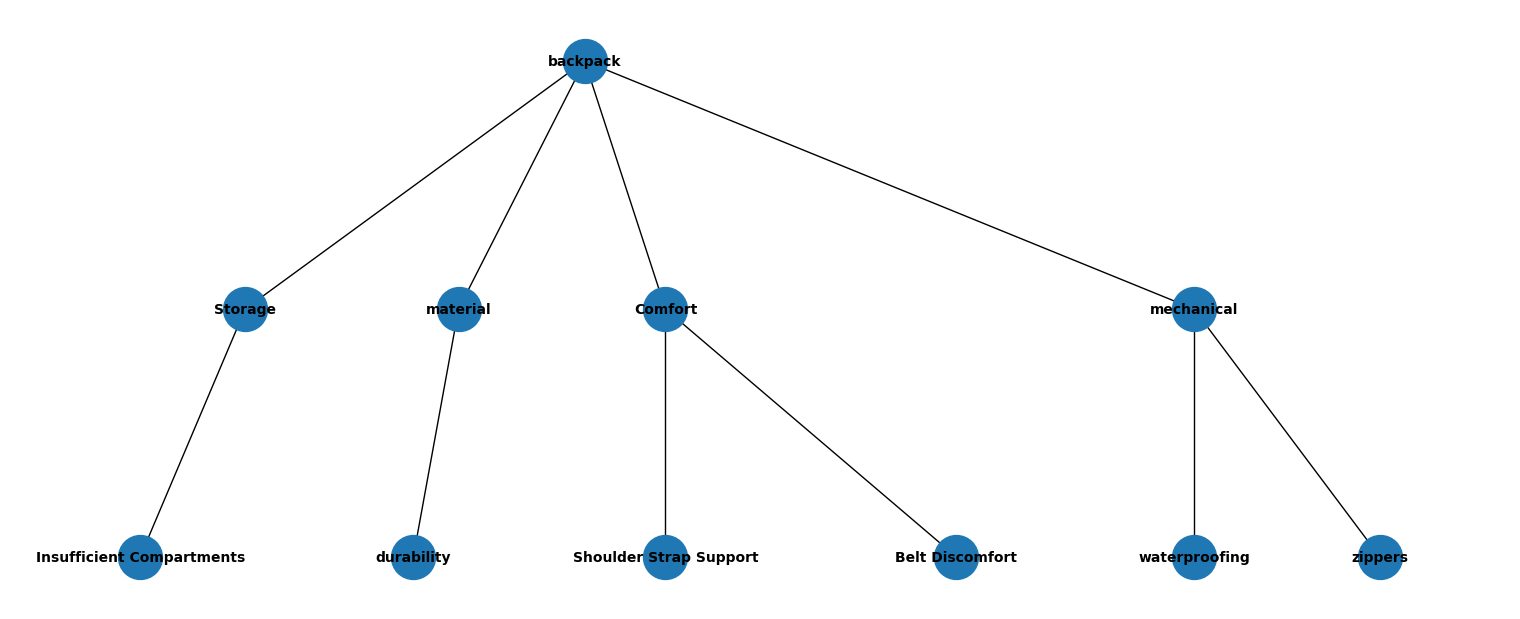


We look at 1 problem in particular and create from it a developed challenge. 
Challenge: Enhancing Backpack Durability

Problem Explanation:
The current material used in backpack manufacturing lacks durability, resulting in frequent wear and tear. This issue leads to decreased product lifespan and customer dissatisfaction. To address this problem, the innovation team needs to find solutions that improve the durability of the backpacks.

Key Performance Indicators (KPIs):
1. Increase in Material Strength: Measure the improvement in the strength of the backpack material by conducting tests to determine its resistance to tearing, stretching, and abrasion. The goal is to enhance the material's durability, ensuring it can withstand regular use and external factors.

2. Reduction in Repair and Replacement Costs: Monitor the decrease in repair and replacement expenses associated with backpacks. By enhancing durability, the innovation team aims to reduce the frequency of repairs and replaceme

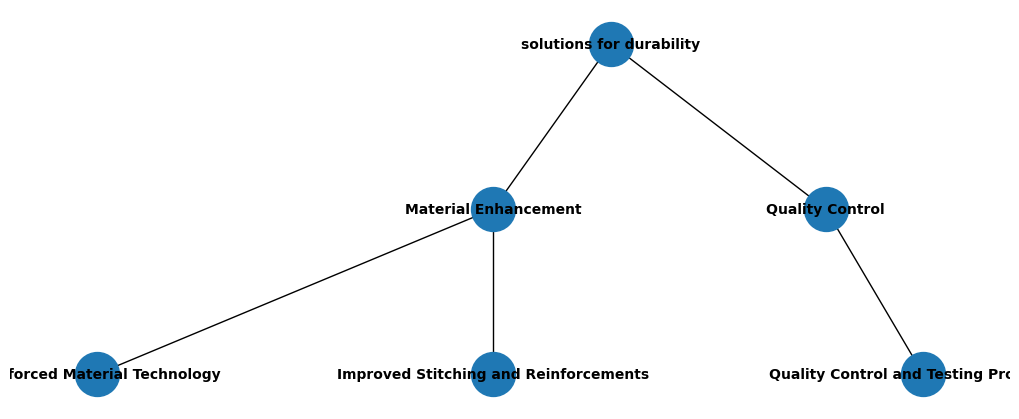

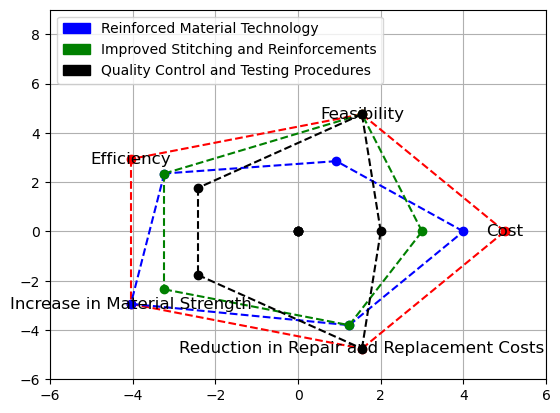

In [83]:
topic_info = ""
top = None
with open('data.pickle', 'rb') as file:
    top = pickle.load(file)
topic_info = top.name + "\n" + top.summary + "\n" + top.get_problems_str()
prob_tree_plot = top.plot_hierarchy_problems()
s1 = "\nWe look at 1 problem in particular and create from it a developed challenge. \n"
topic_challenges = s1 + top.get_challenges_str()
s2 = "\nFrom that challenge we create 3 optional solutions:\n"
sol_str = s2 + top.challenges[0].get_solutions_str()

print(topic_info)
prob_tree_plot.show()
print(topic_challenges + sol_str)
sol_tree_plot = top.challenges[0].plot_hierarchy_solutions((10,4))
sol_grades = plot_solutions_polygons(top.challenges[0].solutions)

In [49]:
def is_exsist(top, problem):
    llm = ChatOpenAI(temperature = 0.0, model="gpt-3.5-turbo")
    template = """given the classifictions: {problems_classes} and problems: {descriptions}, and a new problem: {problem}.
    if the new problem is already exist in the problem list return only the word "exist" without any introduction to your result. 
    else:
        find the best way to classify the new problem from the existing classofications.
        if none of the given classofication match perfectly to the new problem create new general class with meaningful name that will describe the new problem.
        
        """
    prompt = PromptTemplate(input_variables={"problems_classes", "descriptions", "problem"}, template=template)
    chain = LLMChain(llm=llm, prompt=prompt)
    result = chain.run(problems_classes = top.get_problems_classes(), descriptions = top.get_problems_descriptions() ,problem = problem)
    print(result)
    if result.find("is already exist") != -1:
        print("problem already exist")
        return
    
    dict_template = """the below text describes a problem and classification for that problem.
        output the problem and class in the format of python dictionary: ["class": "class_name", "short_name": "name1", "description": "description1"]
        the text: {input}"""
    llm2 = ChatOpenAI(temperature = 0, model="gpt-3.5-turbo")
    prompt2 = PromptTemplate(input_variables={"input"}, template=dict_template)
    chain2 = LLMChain(llm=llm2, prompt=prompt2)
    result = chain2.run(input = result)
    print(result)




problems = """The zippers on my travel backpack keep getting stuck, making it frustrating to access my belongings."

"After just a few trips, the stitching on my backpack is coming undone, and it's falling apart."

"The straps on my backpack are uncomfortable, and they dig into my shoulders during long walks."

"I thought my backpack was water-resistant, but my belongings got soaked in the rain on my last trip."

"The design of my travel backpack doesn't provide enough compartments or pockets, so it's challenging to stay organized."

"The handle on my rolling backpack broke, and now I have to carry it everywhere, defeating the purpose."

"The backpack's zippers are too flimsy, and I'm worried about the security of my items when traveling."

"My backpack's material is not durable; it got torn easily when I accidentally scraped it against a rough surface."

"The size of the backpack is misleading; it's smaller than it appears in the pictures, and I can't fit all my essentials."

"The backpack's weight distribution is uneven, and it strains my back when I carry it for extended periods."""
problems = problems.split("\n\n")

for prob in problems[3:5]:
    is_exsist(top2, prob)
# is_exsist(top2, problems[2])
# top2.add_problem(problems[2])

# for prob in problems[:2]:
#     top2.add_problem(prob)



The new problem "I thought my backpack was water-resistant, but my belongings got soaked in the rain on my last trip" does not exist in the existing problem list. Therefore, we need to classify it based on the existing classifications.

The new problem can be classified under the existing classification of "Limited waterproofing capabilities, making the backpack vulnerable to damage in rainy conditions." This classification aligns with the issue of the backpack not being as water-resistant as expected, resulting in belongings getting soaked in the rain.

Therefore, the new problem can be classified under the existing classification of "Waterproofing" or "Water-resistance."
{"class": "Waterproofing", "short_name": "Limited waterproofing capabilities", "description": "The backpack is not as water-resistant as expected, resulting in belongings getting soaked in the rain."}
The new problem "The design of my travel backpack doesn't provide enough compartments or pockets, so it's challenging

In [3]:
# Deserialize the topic storage
with open('data.pickle', 'rb') as file:
    top = pickle.load(file)

In [81]:
dt = None
with open("demo.pickle", 'rb') as file:
    dt = pickle.load(file)
print(dt)

EOFError: Ran out of input

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [01/Nov/2023 16:02:13] "GET / HTTP/1.1" 200 -


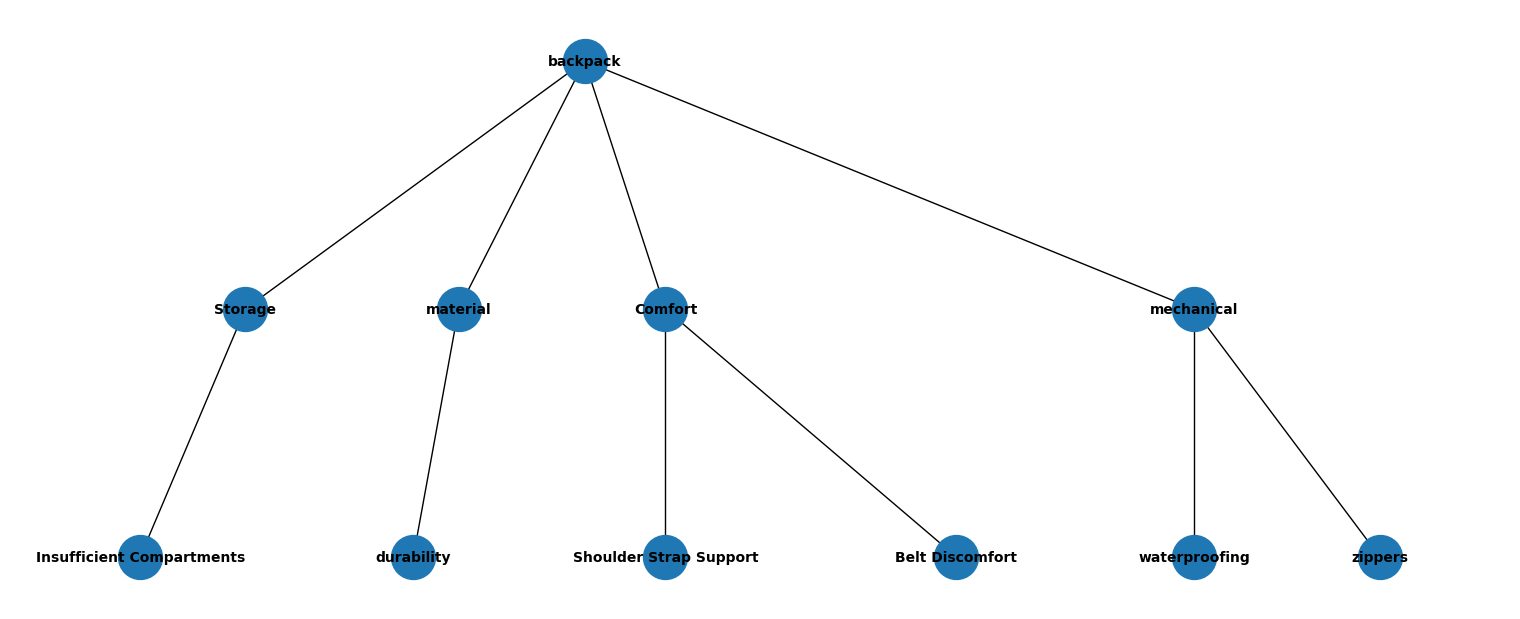

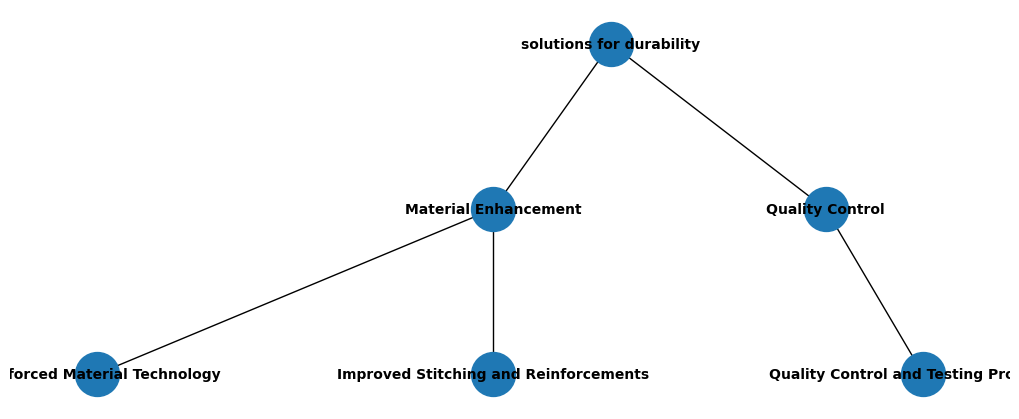

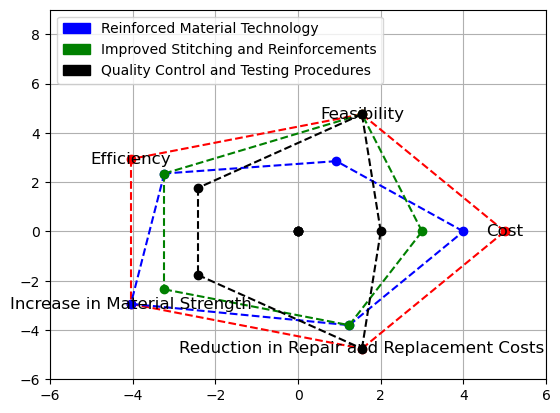

In [86]:
from utils import *

from flask import Flask, render_template
import pickle
import matplotlib.pyplot as plt
import io
import base64

app = Flask(__name__)

@app.route('/')
def display_content():
    # Load data from your 'data.pickle' file
    topic_info, prob_str, prob_tree_plot, topic_challenges, sol_str, sol_tree_plot, sol_grades = load_data()

    return render_template('index.html',
                           topic_info=topic_info,
                           prob_str=prob_str,
                           prob_tree_plot=prob_tree_plot,
                           topic_challenges=topic_challenges,
                           sol_str=sol_str,
                           sol_tree_plot=sol_tree_plot,
                           sol_grades=sol_grades)

def load_data():
    # Load data from your 'data.pickle' file
    topic_info = ""
    prob_tree_plot = None
    topic_challenges = ""
    sol_tree_plot = None
    sol_grades = None

    with open('data.pickle', 'rb') as file:
        top = pickle.load(file)
        topic_info = "Topic is " + top.name + "\n"
        prob_str = top.get_problems_str()
        prob_tree_plot = plot_to_base64(top.plot_hierarchy_problems())
        s1 = "\nWe look at 1 problem in particular and create from it a developed challenge. \n"
        topic_challenges = s1 + top.get_challenges_str()
        s2 = "\nFrom that challenge, we create 3 optional solutions:\n"
        sol_str = s2 + top.challenges[0].get_solutions_str()

        sol_tree_plot = plot_to_base64(top.challenges[0].plot_hierarchy_solutions((10, 4)))
        sol_grades = plot_to_base64(plot_solutions_polygons(top.challenges[0].solutions, to_show=False))

    return topic_info, prob_str, prob_tree_plot, topic_challenges, sol_str, sol_tree_plot, sol_grades

def plot_to_base64(plt_obj):
    buffer = io.BytesIO()
    plt_obj.savefig(buffer, format='png')
    buffer.seek(0)
    plot_data = base64.b64encode(buffer.read()).decode()
    return plot_data

if __name__ == '__main__':
    app.run()


In [35]:
with open('data.pickle', 'wb') as file:
    pickle.dump(top2, file)

In [13]:
from utils import Topic

top = Topic("bed")
with open("streamlit_pkl.pickle", "wb") as file:
    pickle.dump(top, file)